In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os


print(keras.__version__)
print(tf.__version__)

3.4.1
2.17.0


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="PlantVillage",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE  )

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32

2176

(32, 256, 256, 3)


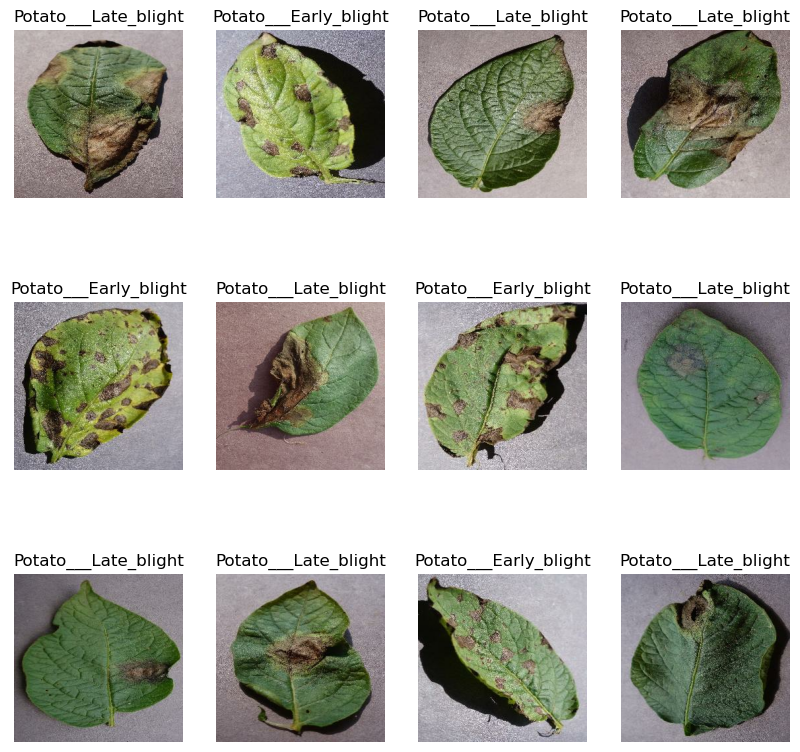

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
   
    for i in range(12):
        
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
   
    

In [8]:
len(dataset)

68

In [9]:
# splitting the data into training , validation and testing datset
training_size  =  0.8
len(dataset)*training_size


54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_spli = 0.1, shuffle = True, shuffle_size= 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int (val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
     tf.keras.layers.RandomRotation(0.2)
])

In [23]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes =3
model = models.Sequential([
    
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

model.build(input_shape=input_shape)

E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [26]:
EPOCHS = 30 
history = model.fit(
          train_ds,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          verbose=1,
          validation_data = val_ds
          )

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 876ms/step - accuracy: 0.4630 - loss: 0.9429 - val_accuracy: 0.6510 - val_loss: 0.7755
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 827ms/step - accuracy: 0.5914 - loss: 0.7966 - val_accuracy: 0.6562 - val_loss: 0.6573
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 760ms/step - accuracy: 0.7500 - loss: 0.5778 - val_accuracy: 0.8229 - val_loss: 0.5299
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 753ms/step - accuracy: 0.7968 - loss: 0.5269 - val_accuracy: 0.8385 - val_loss: 0.3742
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 756ms/step - accuracy: 0.9172 - loss: 0.2301 - val_accuracy: 0.8906 - val_loss: 0.2740
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 754ms/step - accuracy: 0.9599 - loss: 0.1230 - val_accuracy: 0.9010 - val_loss: 0.2085
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 749ms/step - accuracy: 0.9660 - loss: 0.0932 - val_accuracy: 0.8594 - val_loss: 0.3648
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 749ms/step - accuracy: 0.9702 - loss: 0.0822 - val_accu

In [27]:
scores = model.evaluate(test_ds)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.9526 - loss: 0.2413


In [28]:
scores

[0.26784780621528625, 0.953125]

In [29]:
history 

In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
history.history["accuracy"]

[0.5023148059844971,
 0.6452546119689941,
 0.7071759104728699,
 0.8373842835426331,
 0.9108796119689941,
 0.9565972089767456,
 0.9594907164573669,
 0.9756944179534912,
 0.9513888955116272,
 0.9513888955116272,
 0.9664351940155029,
 0.9756944179534912,
 0.9803240895271301,
 0.9716435074806213,
 0.9762731194496155,
 0.9739583134651184,
 0.9855324029922485,
 0.9820601940155029,
 0.9635416865348816,
 0.9895833134651184,
 0.9866898059844971,
 0.9913194179534912,
 0.9693287014961243,
 0.9739583134651184,
 0.9895833134651184,
 0.9959490895271301,
 0.9826388955116272,
 0.9918981194496155,
 0.9733796119689941,
 0.9866898059844971]

In [33]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

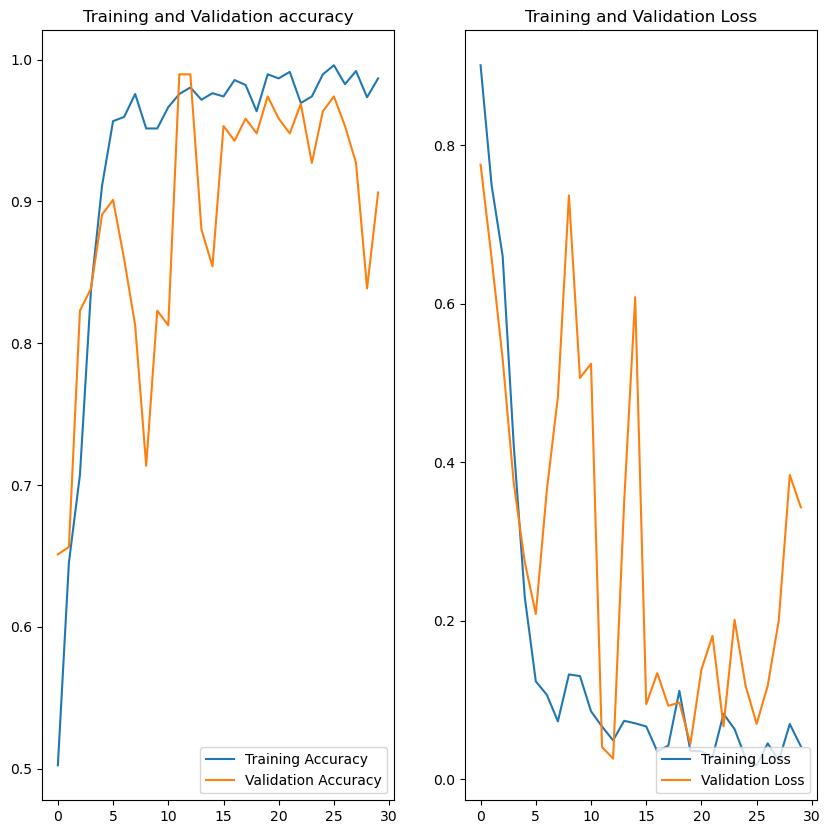

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc ="lower right")
plt.title("Training and Validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc ="lower right")
plt.title("Training and Validation Loss")
plt.show()

First image to predict:


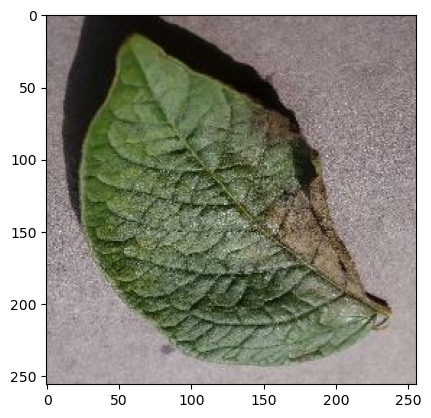

Actual label:  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Predicted label: Potato___Late_blight


In [35]:
import numpy as np
import matplotlib.pyplot as plt

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict:")
    plt.imshow(first_image)
    plt.show()
    
    print("Actual label: ", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    predicted_label = np.argmax(batch_prediction[0])
    print("Predicted label:", class_names[predicted_label])


In [36]:
def predict(model, image):
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    predictions = model.predict(image)
    confidence = np.max(predictions)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


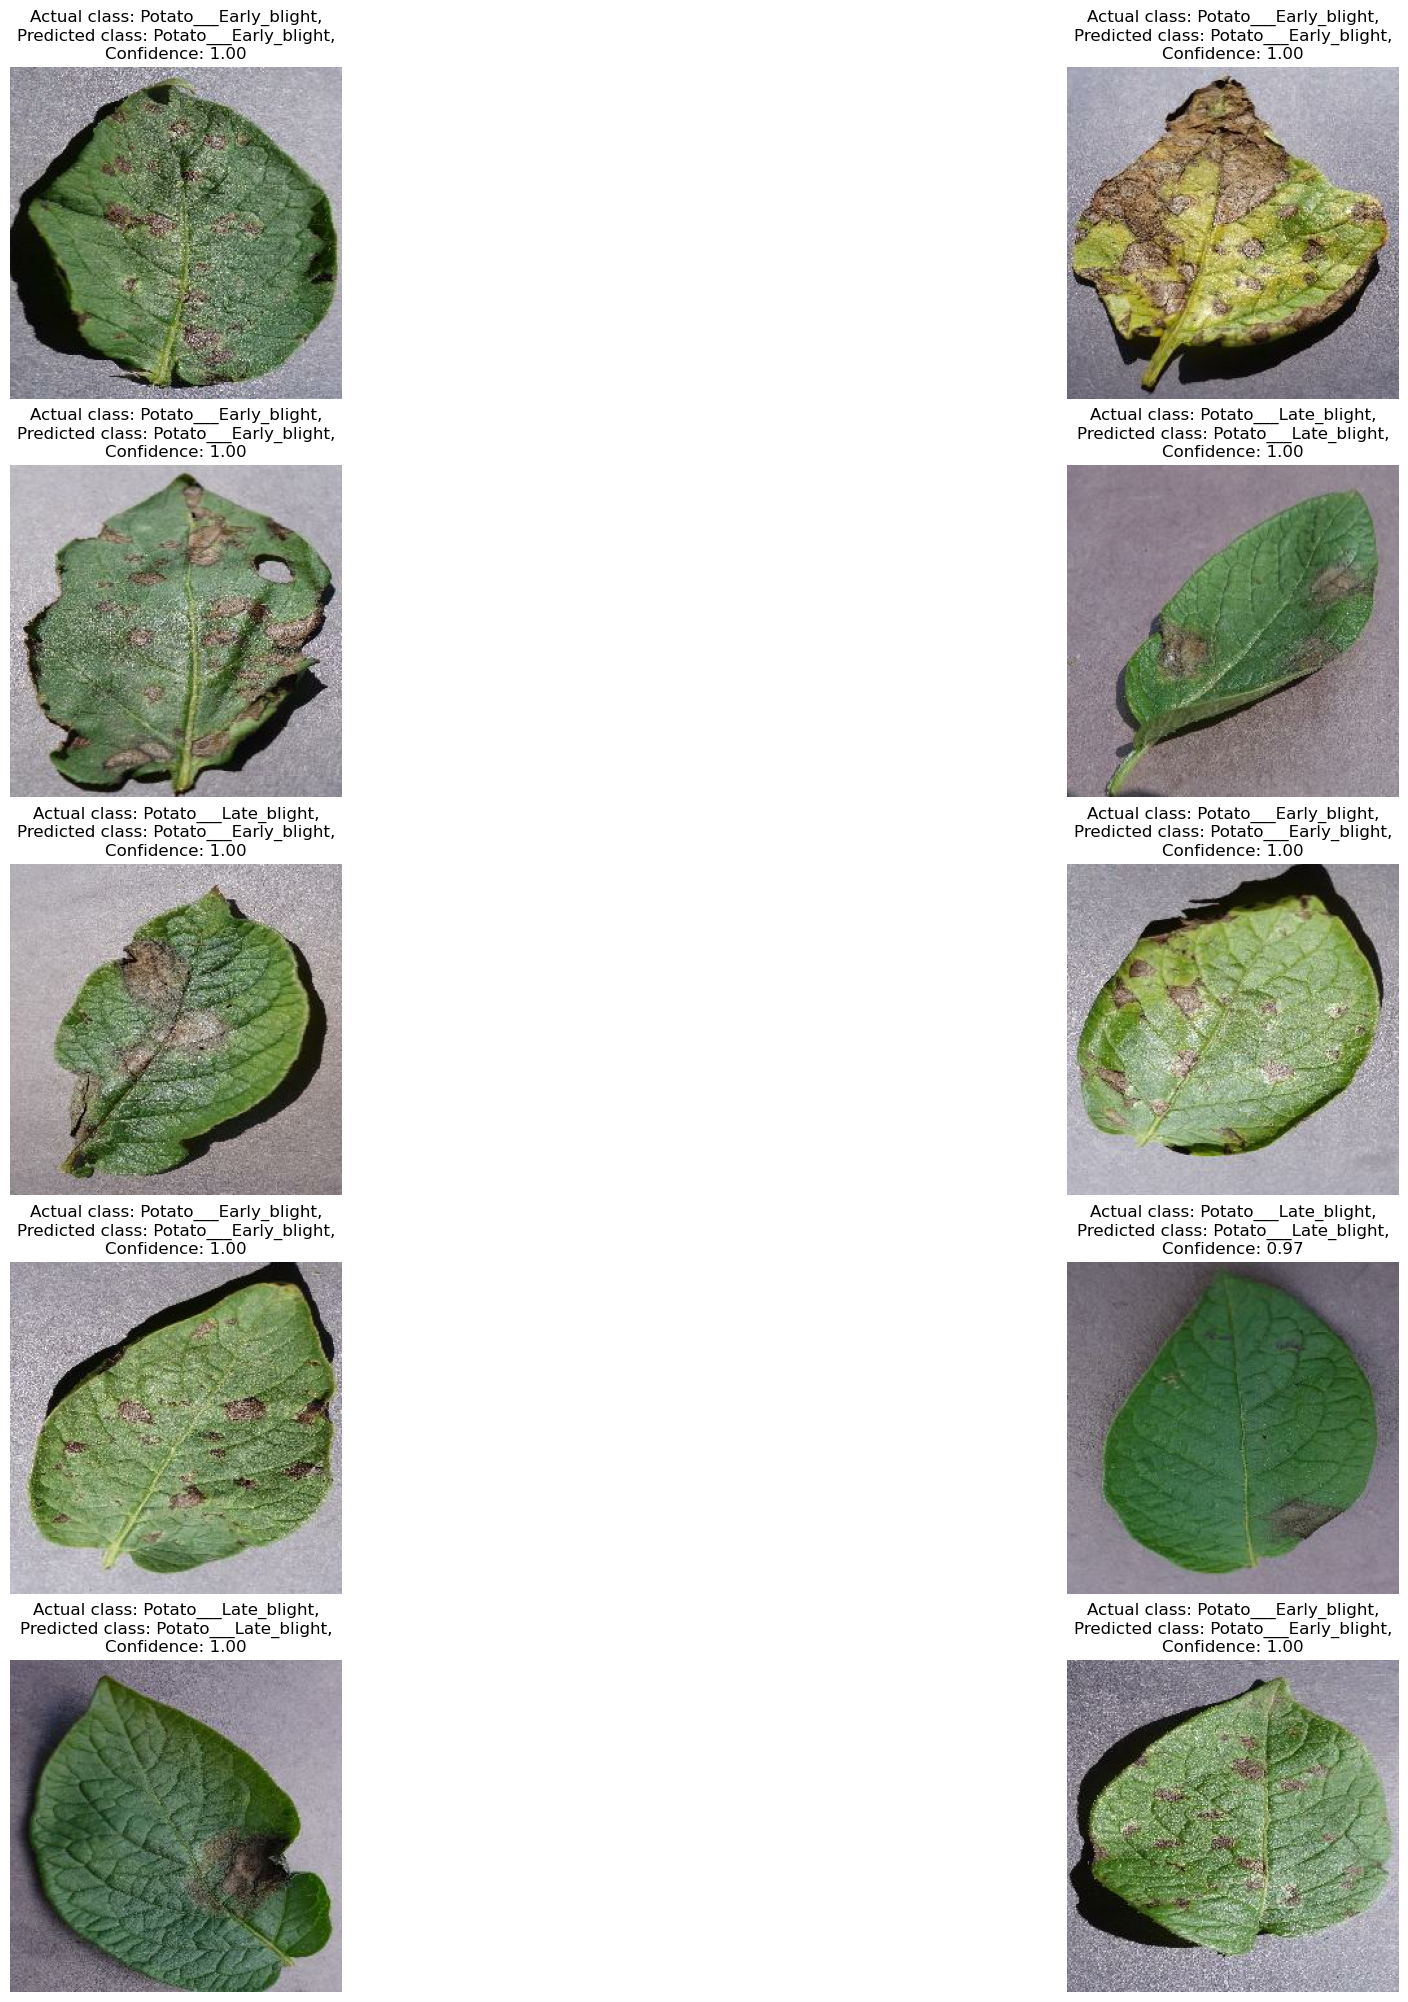

In [37]:
plt.figure(figsize=(25, 25))
for images, labels in test_ds.take(1):
    for i in range(10):
        ax = plt.subplot(5, 2, i + 1)  # Correct way to add a subplot
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]  # Correctly accessing the class name
        
        plt.title(f"Actual class: {actual_class},\nPredicted class: {predicted_class},\nConfidence: {confidence:.2f}")
        plt.axis("off")  # Correct way to turn off the axis

plt.show()  # Show the plot


In [43]:
# Define the model name and path
model_name = "Potato_model"
model_path = f"C:/Users/bobby/pototo_dieses/models/{model_name}"

# Ensure the directory exists
os.makedirs(model_path, exist_ok=True)

# Save the model
model.export(model_path)



INFO:tensorflow:Assets written to: C:/Users/bobby/pototo_dieses/models/Potato_model\assets


INFO:tensorflow:Assets written to: C:/Users/bobby/pototo_dieses/models/Potato_model\assets


Saved artifact at 'C:/Users/bobby/pototo_dieses/models/Potato_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1433178121680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433178121872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433178120528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433178115344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433178113424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433178120720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433078926032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433078925264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433078925648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433078926608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14

In [ ]:
import os
import tensorflow as tf

model_name = "Potato_model_2.h5"
model_path = f"C:/Users/bobby/pototo_dieses/models/{model_name}"

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model in .h5 format
model.save(model_path)



In [45]:
import os
import tensorflow as tf

model_name = "Potato_model_3.keras"
model_path = f"C:/Users/bobby/pototo_dieses/models/{model_name}"

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model in .h5 format
model.save(model_path)


In [46]:
import os
import tensorflow as tf

model_name = "Potato_model_4.keras"
model_path = f"C:/Users/bobby/pototo_dieses/models/{model_name}"

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model in .h5 format
model.save(model_path)

In [47]:
import os
import tensorflow as tf

model_name = "Potato_model_5.keras"
model_path = f"C:/Users/bobby/pototo_dieses/models/{model_name}"

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model in .h5 format
model.save(model_path)